<a href="https://colab.research.google.com/github/mcakyerima/ML-for-beginners/blob/main/MNIST_Digits_Classification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Library Imports

In [1]:
# NumPy is used for numerical operations and handling arrays.
import numpy as np

# Matplotlib is used for plotting graphs and visualizations.
import matplotlib.pyplot as plt

# Pandas is used for data manipulation and analysis, particularly with dataframes.
import pandas as pd

# Seaborn is used for making statistical graphics and enhancing Matplotlib's visualizations.
import seaborn as sns

# Keras is a high-level neural networks API, written in Python.
import keras
# Sequential model is a linear stack of layers.
from keras.models import Sequential
# Dense is a fully connected layer used in building neural networks.
from keras.layers import Dense
# Dropout is a regularization technique to prevent overfitting in the model.
from keras.layers import Dropout
from keras import Input

# Scikit-learn provides simple and efficient tools for predictive data analysis.
# Confusion matrix is used to evaluate the accuracy of a classification.
from sklearn.metrics import confusion_matrix

# This magic command is used to ensure that plots are displayed inline within the Jupyter Notebook.
%matplotlib inline

# maintain a constant result every time we run our code
np.random.seed(123)

## Data

In [2]:
from keras.datasets import mnist

(X_train, y_train), (X_test, y_test) = mnist.load_data()

11490434/11490434 [==============================] - 1s 0us/step


In [3]:
# printing the dimensions and shapes of the dataset and adding string identifiers to the print
print(f"X_train shape: {X_train.shape}")
print(f"y_train shape: {y_train.shape}")
print(f"X_test shape: {X_test.shape}")
print(f"y_test shape: {y_test.shape}")


X_train shape: (60000, 28, 28)
y_train shape: (60000,)
X_test shape: (10000, 28, 28)
y_test shape: (10000,)


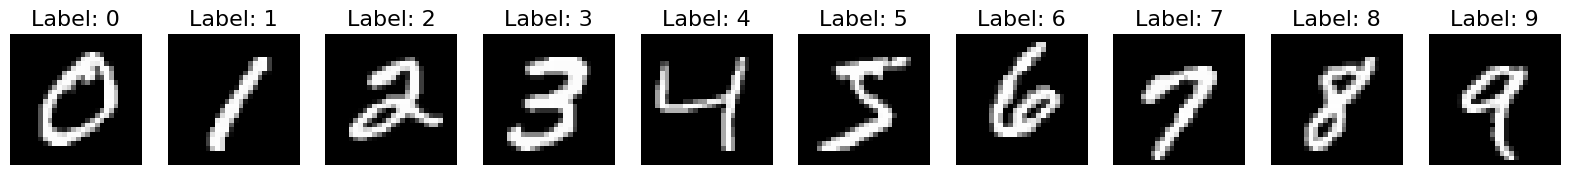

In [4]:
## visualize some examples
num_classes = 10
fig, axes = plt.subplots(1, num_classes, figsize=(20, 10))
for i in range(0, num_classes):
  sample = X_train[y_train == i][0]
  axes[i].imshow(sample, cmap='gray')
  axes[i].set_title(f"Label: {i}", fontsize=16)
  axes[i].axis('off')

In [5]:
# samples = X_train[y_train == 3]
# # DISPLAY THE SAMPLES
# fig, axes = plt.subplots(1, 10, figsize=(20, 10))
# for i in range(0, 10):
#   axes[i].imshow(samples[i], cmap='gray')
#   axes[i].axis('off')

In [6]:
# look our our labels for classification
for i in range(10):
  print(y_train[i])

5
0
4
1
9
2
1
3
1
4


## One Hot Encoding:

In this section, we will discuss the concept of one-hot encoding and why it is important for classification tasks in machine learning. When dealing with classification problems, numerical labels are not suitable for training machine learning models, as they might incorrectly imply an ordinal relationship between the classes. Instead, we use one-hot encoding to convert these labels into a binary format that the model can better interpret. Each class label is converted into a vector where only the index corresponding to the class is set to 1, and all other indices are set to 0. This transformation helps in better classification by the model.

### Code Cell:

```python
# Import the necessary function to perform one-hot encoding.
from keras.utils import to_categorical

# Define the number of classes.
num_classes = 10

# One-hot encode the training labels.
y_train = to_categorical(y_train, num_classes)
# One-hot encode the test labels.
y_test = to_categorical(y_test, num_classes)

# Display the first 10 one-hot encoded labels from the training set.
for i in range(10):
    print(f"Label {i}: {y_train[i]}")
```

### Explanation:

1. **Importing the to_categorical function**:
    - `from keras.utils import to_categorical`: This function is used to convert class vectors (integers) to binary class matrices.

2. **Defining the number of classes**:
    - `num_classes = 10`: The MNIST dataset has 10 classes, representing the digits 0 through 9.

3. **One-hot encoding the training labels**:
    - `y_train = to_categorical(y_train, num_classes)`: This line converts the training labels into a one-hot encoded format.

4. **One-hot encoding the test labels**:
    - `y_test = to_categorical(y_test, num_classes)`: This line converts the test labels into a one-hot encoded format.

5. **Displaying the one-hot encoded labels**:
    - `for i in range(10): print(f"Label {i}: {y_train[i]}")`: This loop prints the first 10 one-hot encoded labels from the training set. Each label is now represented as a vector of length 10, where only one element is 1, and the rest are 0.

In [7]:
# Import the necessary function to perform one-hot encoding.
from keras.utils import to_categorical

# One-hot encode the training labels.
y_train = to_categorical(y_train, 10)
# One-hot encode the test labels.
y_test = to_categorical(y_test, 10)



In [8]:
for i in range(10):
  print(y_train[i])

[0. 0. 0. 0. 0. 1. 0. 0. 0. 0.]
[1. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
[0. 0. 0. 0. 1. 0. 0. 0. 0. 0.]
[0. 1. 0. 0. 0. 0. 0. 0. 0. 0.]
[0. 0. 0. 0. 0. 0. 0. 0. 0. 1.]
[0. 0. 1. 0. 0. 0. 0. 0. 0. 0.]
[0. 1. 0. 0. 0. 0. 0. 0. 0. 0.]
[0. 0. 0. 1. 0. 0. 0. 0. 0. 0.]
[0. 1. 0. 0. 0. 0. 0. 0. 0. 0.]
[0. 0. 0. 0. 1. 0. 0. 0. 0. 0.]


# Reshape our data
### Explanation:

In this section, we will normalize and reshape our data to prepare it for training a neural network. Normalization is a crucial preprocessing step that helps in speeding up the training process and improving the model's performance. By scaling the pixel values to be between 0 and 1, we ensure that our neural network can process the data more effectively. Additionally, reshaping the data from 2D to 1D arrays is necessary for feeding it into certain types of neural network layers that expect flat input vectors.


```python
# Let's normalize the data to make our training easy.
# The pixel values range from 0 to 255, so we divide by 255 to scale them between 0 and 1.
X_train = X_train / 255
X_test = X_test / 255

# Print the number of training samples.
print(f"Number of training samples: {X_train.shape[0]}")

# Reshape the data from 2D arrays (28x28) to 1D arrays (784 elements) for each sample.
X_train = X_train.reshape(60000, -1)
X_test = X_test.reshape(10000, -1)

# Print the new shape of the training data to confirm the reshaping.
print(f"New shape of X_train: {X_train.shape}")
print(f"New shape of X_test: {X_test.shape}")
```

### Explanation:

1. **Normalization**:
    - `X_train = X_train / 255`: This line scales the training data by dividing each pixel value by 255, converting the range from [0, 255] to [0, 1].
    - `X_test = X_test / 255`: Similarly, this line scales the test data.

2. **Print the number of training samples**:
    - `print(f"Number of training samples: {X_train.shape[0]}")`: This prints the number of samples in the training set, which should be 60,000 for the MNIST dataset.

3. **Reshaping the data**:
    - `X_train = X_train.reshape(60000, -1)`: This reshapes the training data from 28x28 pixel images to 1D arrays of 784 elements (28 * 28 = 784).
    - `X_test = X_test.reshape(10000, -1)`: Similarly, this reshapes the test data.

4. **Print the new shapes**:
    - `print(f"New shape of X_train: {X_train.shape}")`: This prints the new shape of the training data to confirm that it has been reshaped to (60000, 784).
    - `print(f"New shape of X_test: {X_test.shape}")`: This prints the new shape of the test data to confirm that it has been reshaped to (10000, 784).

In [9]:
# lets normalize the data to make our training easy
X_train = X_train / 255
X_test = X_test / 255

print(X_train.shape[0])

60000


In [10]:
# Reshaping our data
X_train = X_train.reshape(60000, -1)
X_test = X_test.reshape(10000, -1)

print(X_train.shape)
print(X_test.shape)

(60000, 784)
(10000, 784)


## Creating a Nerual Network:

In this section, we will create a fully connected neural network using Keras. A fully connected neural network, also known as a dense neural network, consists of layers where each neuron is connected to every neuron in the next layer. We will define a sequential model, add layers to it, compile the model, and then summarize its architecture.

### Code Cell:

```python
# Import necessary libraries from Keras.
from keras.models import Sequential
from keras.layers import Dense, Dropout

# Initialize a sequential model, which is a linear stack of layers.
model = Sequential()

# Add the first dense layer with 128 neurons, ReLU activation, and input shape of 784 (flattened 28x28 image).
model.add(Dense(128, input_shape=(784,), activation='relu'))

# Add a second dense layer with 128 neurons and ReLU activation.
model.add(Dense(128, activation='relu'))

# Add a dropout layer with a 25% dropout rate to prevent overfitting.
model.add(Dropout(0.25))

# Add an output dense layer with 10 neurons (one for each class) and softmax activation.
model.add(Dense(10, activation='softmax'))

# Compile the model with categorical cross-entropy loss, Adam optimizer, and accuracy metric.
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

# Print a summary of the model architecture.
model.summary()
```

### Explanation:

1. **Import necessary libraries**:
    - `from keras.models import Sequential`: Sequential is used to initialize a linear stack of layers.
    - `from keras.layers import Dense, Dropout`: Dense is a fully connected layer, and Dropout is a regularization technique to prevent overfitting.

2. **Initialize a sequential model**:
    - `model = Sequential()`: This initializes a new sequential model.

3. **Add the first dense layer**:
    - `model.add(Dense(128, input_shape=(784,), activation='relu'))`: This adds a dense layer with 128 neurons, ReLU activation function, and an input shape of 784 (since each image is flattened to 784 pixels).

4. **Add a second dense layer**:
    - `model.add(Dense(128, activation='relu'))`: This adds another dense layer with 128 neurons and ReLU activation function.

5. **Add a dropout layer**:
    - `model.add(Dropout(0.25))`: This adds a dropout layer with a dropout rate of 25%, which helps prevent overfitting by randomly setting 25% of the input units to 0 at each update during training.

6. **Add an output dense layer**:
    - `model.add(Dense(10, activation='softmax'))`: This adds the output layer with 10 neurons (one for each class) and softmax activation function, which converts the outputs to probability distributions.

7. **Compile the model**:
    - `model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])`: This compiles the model with categorical cross-entropy loss function, Adam optimizer, and accuracy metric.

8. **Print the model summary**:
    - `model.summary()`: This prints a summary of the model architecture, including the layers, their shapes, and the number of parameters.


In [11]:
model = Sequential()
model.add(Dense(128, input_shape=(784,), activation='relu'))
model.add(Dense(128, activation='relu'))
model.add(Dropout(0.25))
model.add(Dense(10, activation='softmax'))
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 128)               100480    
                                                                 
 dense_1 (Dense)             (None, 128)               16512     
                                                                 
 dropout (Dropout)           (None, 128)               0         
                                                                 
 dense_2 (Dense)             (None, 10)                1290      
                                                                 
Total params: 118282 (462.04 KB)
Trainable params: 118282 (462.04 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


### Training the Model:

In this section, we will train the neural network model that we created in the previous step. Training the model involves feeding the training data into the model, allowing it to learn the patterns in the data, and adjusting its parameters (weights) to minimize the loss function. We will specify the batch size and the number of epochs for the training process. The batch size determines how many samples the model processes before updating its parameters, and the number of epochs is how many times the entire dataset is passed through the model.

### Code Cell:

```python
# Define the batch size and number of epochs for training.
batch_size = 512
epochs = 10

# Train the model using the training data.
# - X_train: The training images.
# - y_train: The one-hot encoded training labels.
# - batch_size: The number of samples per gradient update.
# - epochs: The number of times to iterate over the training data.
model.fit(X_train, y_train, batch_size=batch_size, epochs=epochs)
```

### Explanation:

1. **Define the batch size and number of epochs**:
    - `batch_size = 512`: This sets the batch size to 512, meaning the model will process 512 samples at a time before updating its parameters.
    - `epochs = 10`: This sets the number of epochs to 10, meaning the model will iterate over the entire training dataset 10 times.

2. **Train the model**:
    - `model.fit(X_train, y_train, batch_size=batch_size, epochs=epochs)`: This method trains the model using the training data.
      - `X_train`: The training images that have been normalized and reshaped.
      - `y_train`: The one-hot encoded training labels.
      - `batch_size`: The number of samples per gradient update.
      - `epochs`: The number of times to iterate over the training data.

During training, the model adjusts its parameters (weights) to minimize the loss function, learning to make better predictions on the training data. The training process will output the progress for each epoch, showing the loss and accuracy for the training data.

In [12]:
# Training the model
batch_size = 512
epochs = 10
model.fit(X_train, y_train, batch_size=batch_size, epochs=epochs)

Epoch 1/10
118/118 [==============================] - 3s 16ms/step - loss: 0.6082 - accuracy: 0.8210
Epoch 2/10
118/118 [==============================] - 1s 11ms/step - loss: 0.2323 - accuracy: 0.9326
Epoch 3/10
118/118 [==============================] - 1s 9ms/step - loss: 0.1712 - accuracy: 0.9504
Epoch 4/10
118/118 [==============================] - 1s 10ms/step - loss: 0.1377 - accuracy: 0.9596
Epoch 5/10
118/118 [==============================] - 1s 10ms/step - loss: 0.1159 - accuracy: 0.9660
Epoch 6/10
118/118 [==============================] - 1s 10ms/step - loss: 0.0987 - accuracy: 0.9701
Epoch 7/10
118/118 [==============================] - 1s 10ms/step - loss: 0.0861 - accuracy: 0.9744
Epoch 8/10
118/118 [==============================] - 1s 9ms/step - loss: 0.0742 - accuracy: 0.9780
Epoch 9/10
118/118 [==============================] - 1s 10ms/step - loss: 0.0675 - accuracy: 0.9797
Epoch 10/10
118/118 [==============================] - 1s 9ms/step - loss: 0.0576 - accuracy:

# Evaluating the model

In this section, we will evaluate the trained neural network model on the test data. Evaluating the model involves measuring its performance on a separate set of data that was not used during training. This helps us understand how well the model generalizes to new, unseen data. We will calculate the loss and accuracy on the test dataset and print these values.

### Code Cell:

```python
# Evaluate the model using the test data.
# - X_test: The test images.
# - y_test: The one-hot encoded test labels.
test_loss, test_acc = model.evaluate(X_test, y_test)

# Print the test accuracy and test loss.
print(f"Test accuracy: {test_acc}")
print(f"Test loss: {test_loss}")
```

### Explanation:

1. **Evaluate the model**:
    - `test_loss, test_acc = model.evaluate(X_test, y_test)`: This method evaluates the model on the test data.
      - `X_test`: The test images that have been normalized and reshaped.
      - `y_test`: The one-hot encoded test labels.
      - The method returns two values: the loss on the test data (`test_loss`) and the accuracy on the test data (`test_acc`).

2. **Print the test accuracy and test loss**:
    - `print(f"Test accuracy: {test_acc}")`: This prints the accuracy of the model on the test data, which indicates the proportion of correctly classified images.
    - `print(f"Test loss: {test_loss}")`: This prints the loss of the model on the test data, which measures how well the model's predictions match the actual labels.

By evaluating the model on the test data, we can get an idea of how well it performs on new, unseen data, which is crucial for assessing its generalization capability.

In [13]:
# loss and accuracy
test_loss, test_acc = model.evaluate(X_test, y_test)
print(f"Test accuracy: {test_acc}")
print(f"Test loss: {test_loss}")


313/313 [==============================] - 1s 2ms/step - loss: 0.0832 - accuracy: 0.9728
Test accuracy: 0.9728000164031982
Test loss: 0.08324604481458664


# Making predictions
In this section, we will use the trained neural network model to make predictions on the test data. After making the predictions, we will extract the predicted class labels by finding the index of the class with the highest probability for each test sample. This step helps us understand what the model predicts for each test image.

### Code Cell:

```python
# Make predictions on the test data.
# - X_test: The test images.
y_pred = model.predict(X_test)

# Get the index of the class with the highest probability for each prediction.
# - np.argmax: This function returns the indices of the maximum values along an axis.
# - axis=1: We want the indices of the maximum values along the second axis (each row).
y_pred_classes = np.argmax(y_pred, axis=1)

# Print the predicted probabilities for the test data.
print("Predicted probabilities:")
print(y_pred)

# Print the predicted class labels for the test data.
print("Predicted class labels:")
print(y_pred_classes)
```

### Explanation:

1. **Make predictions on the test data**:
    - `y_pred = model.predict(X_test)`: This method uses the trained model to make predictions on the test data.
      - `X_test`: The test images that have been normalized and reshaped.
      - The method returns an array of predicted probabilities for each class.

2. **Get the predicted class labels**:
    - `y_pred_classes = np.argmax(y_pred, axis=1)`: This function returns the indices of the maximum values along the specified axis.
      - `np.argmax`: Finds the index of the maximum value.
      - `axis=1`: Specifies that we want the indices of the maximum values along the second axis (each row), effectively giving us the predicted class for each test sample.

3. **Print the predicted probabilities**:
    - `print("Predicted probabilities:")`: This prints a header indicating that the following output is the predicted probabilities.
    - `print(y_pred)`: This prints the array of predicted probabilities for each test sample.

4. **Print the predicted class labels**:
    - `print("Predicted class labels:")`: This prints a header indicating that the following output is the predicted class labels.
    - `print(y_pred_classes)`: This prints the array of predicted class labels for each test sample, showing which class the model thinks each test image belongs to.

By making predictions and extracting the class labels, we can see how the model performs on individual test samples and understand its predictions in more detail.

In [14]:
# prediction with test data
y_pred = model.predict(X_test)
# Getting the index of the classes with the highest probability.
y_pred_classes = np.argmax(y_pred, axis=1)

print(y_pred)
print(y_pred_classes)


313/313 [==============================] - 1s 2ms/step
[[3.1717923e-07 3.3932574e-07 1.4729640e-05 ... 9.9966788e-01
  1.2223832e-06 9.0330841e-06]
 [2.7282974e-08 1.1136462e-03 9.9887216e-01 ... 2.3683602e-07
  5.9742433e-07 1.3588407e-11]
 [1.8289622e-06 9.9543250e-01 2.3106563e-04 ... 3.1145737e-03
  5.5009604e-04 2.0491954e-05]
 ...
 [3.8254905e-10 5.9310992e-09 2.7328079e-10 ... 4.4610274e-06
  3.6016232e-07 4.7770509e-06]
 [1.4057741e-08 2.8953626e-09 1.3275938e-11 ... 1.8262121e-08
  1.9382718e-05 1.8044956e-08]
 [1.8866573e-09 3.3446360e-10 4.9466689e-08 ... 5.6793719e-12
  1.0583405e-10 1.5266248e-11]]
[7 2 1 ... 4 5 6]


# Predicting a Random Image:

In this section, we will predict the label of a single, randomly selected image from the test set. This allows us to visually inspect how well the model performs on individual samples. We will randomly choose an image, predict its label using the trained model, and compare it with the true label. We will also display the image along with its predicted and true labels.

### Code Cell:

```python
# Predicting a single random number
# Select a random index from the test set.
random_index = np.random.choice(len(X_test))

# Get the corresponding image from the test set.
random_image = X_test[random_index]

# Get the true labels of all test images.
# - np.argmax: This function returns the indices of the maximum values along an axis.
# - axis=1: We want the indices of the maximum values along the second axis (each row).
image_labels = np.argmax(y_test, axis=1) # y_true

# Get the true label of the selected random image.
random_image_label = image_labels[random_index]

# Get the predicted label of the selected random image.
predicted_image_label = y_pred_classes[random_index]

# Print the shape of the selected random image to verify.
print(f"Shape of the random image: {random_image.shape}")

# Print the true labels of all test images.
print("True labels of test images:")
print(image_labels)

# Print the true label of the selected random image.
print(f"True label of the random image: {random_image_label}")

# Show the selected random image and its predicted and true labels.
plt.imshow(random_image.reshape(28, 28), cmap='gray')
plt.title(f"True Label: {random_image_label}, Predicted Label: {predicted_image_label}")
plt.show()
```

### Explanation:

1. **Select a random index from the test set**:
    - `random_index = np.random.choice(len(X_test))`: This selects a random index from the range of the test set length.

2. **Get the corresponding image from the test set**:
    - `random_image = X_test[random_index]`: This retrieves the image at the randomly selected index from the test set.

3. **Get the true labels of all test images**:
    - `image_labels = np.argmax(y_test, axis=1)`: This converts the one-hot encoded test labels to their original class labels.

4. **Get the true label of the selected random image**:
    - `random_image_label = image_labels[random_index]`: This retrieves the true label of the randomly selected image.

5. **Get the predicted label of the selected random image**:
    - `predicted_image_label = y_pred_classes[random_index]`: This retrieves the predicted label of the randomly selected image from the predictions made by the model.

6. **Print the shape of the selected random image**:
    - `print(f"Shape of the random image: {random_image.shape}")`: This prints the shape of the selected random image to verify its dimensions.

7. **Print the true labels of all test images**:
    - `print("True labels of test images:")`: This prints a header indicating that the following output is the true labels.
    - `print(image_labels)`: This prints the true labels of all test images.

8. **Print the true label of the selected random image**:
    - `print(f"True label of the random image: {random_image_label}")`: This prints the true label of the selected random image.

9. **Show the selected random image and its predicted and true labels**:
    - `plt.imshow(random_image.reshape(28, 28), cmap='gray')`: This displays the selected random image in grayscale.
    - `plt.title(f"True Label: {random_image_label}, Predicted Label: {predicted_image_label}")`: This sets the title of the plot to show the true and predicted labels.
    - `plt.show()`: This displays the plot.

(784,)
[7 2 1 ... 4 5 6]
1


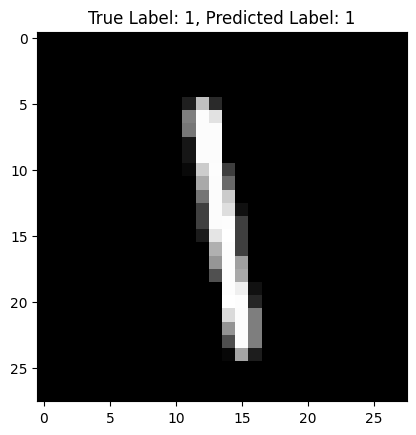

In [15]:
# Pridicting a single random number
random_index = np.random.choice(len(X_test))
random_image = X_test[random_index]
image_labels = np.argmax(y_test, axis=1) # y_true

random_image_label = image_labels[random_index]
predicted_image_label = y_pred_classes[random_index]

print(random_image.shape)
print(image_labels)
print(random_image_label)

# show the predicted image and the label + the true label
plt.imshow(random_image.reshape(28, 28), cmap='gray')
plt.title(f"True Label: {random_image_label}, Predicted Label: {predicted_image_label}")
plt.imshow(random_image.reshape(28, 28), cmap='gray')


# Confusion Matrix

In this section, we will introduce the concept of a confusion matrix and explain its importance in evaluating the performance of a classification model. A confusion matrix is a table used to describe the performance of a classification algorithm. It allows us to see how many of the predictions were correct and how many were incorrect, broken down by each class. The matrix shows the true labels on one axis and the predicted labels on the other, providing a comprehensive view of how well the model is performing on each class.

### Code Cell:

```python
# Import necessary libraries for plotting the confusion matrix.
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix

# Generate the confusion matrix.
# - image_labels: The true labels of the test set.
# - y_pred_classes: The predicted labels by the model.
cm = confusion_matrix(image_labels, y_pred_classes)

# Set up the plot for the confusion matrix.
plt.figure(figsize=(9, 7))

# Create a heatmap for the confusion matrix.
# - cm: The confusion matrix.
# - annot=True: Annotate each cell with the numeric value.
# - fmt='d': Format the annotations as integers.
# - cmap='Blues': Use a blue color map.
axis = sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')

# Set the title and labels for the heatmap.
axis.set_title('Confusion Matrix')
axis.set_xlabel('Predicted Labels')
axis.set_ylabel('True Labels')

# Display the plot.
plt.show()
```

### Explanation:

1. **Import necessary libraries**:
    - `import seaborn as sns`: Seaborn is a data visualization library that makes it easy to create informative and attractive statistical graphics.
    - `import matplotlib.pyplot as plt`: Matplotlib is a plotting library used to create static, interactive, and animated visualizations in Python.
    - `from sklearn.metrics import confusion_matrix`: The confusion_matrix function from scikit-learn is used to compute the confusion matrix.

2. **Generate the confusion matrix**:
    - `cm = confusion_matrix(image_labels, y_pred_classes)`: This line generates the confusion matrix using the true labels (`image_labels`) and the predicted labels (`y_pred_classes`).

3. **Set up the plot for the confusion matrix**:
    - `plt.figure(figsize=(9, 7))`: This sets the size of the plot to 9 inches by 7 inches.

4. **Create a heatmap for the confusion matrix**:
    - `axis = sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')`: This line creates a heatmap of the confusion matrix.
        - `cm`: The confusion matrix.
        - `annot=True`: Annotate each cell with the numeric value.
        - `fmt='d'`: Format the annotations as integers.
        - `cmap='Blues'`: Use a blue color map for the heatmap.

5. **Set the title and labels for the heatmap**:
    - `axis.set_title('Confusion Matrix')`: This sets the title of the heatmap.
    - `axis.set_xlabel('Predicted Labels')`: This sets the label for the x-axis to "Predicted Labels".
    - `axis.set_ylabel('True Labels')`: This sets the label for the y-axis to "True Labels".

6. **Display the plot**:
    - `plt.show()`: This displays the heatmap.

### What is a Confusion Matrix?

A confusion matrix is a summary of prediction results on a classification problem. The number of correct and incorrect predictions are summarized with count values and broken down by each class. This is essential for understanding the types of errors the model is making.

- **True Positives (TP)**: The model correctly predicted the positive class.
- **True Negatives (TN)**: The model correctly predicted the negative class.
- **False Positives (FP)**: The model incorrectly predicted the positive class (Type I error).
- **False Negatives (FN)**: The model incorrectly predicted the negative class (Type II error).

### Why Do We Need a Confusion Matrix?

A confusion matrix provides more detailed information than simple accuracy metrics. It allows us to:

- Understand how well the model is performing for each class.
- Identify specific classes where the model may be underperforming.
- Get insights into the types of errors the model is making, which can guide further improvements and tuning of the model.

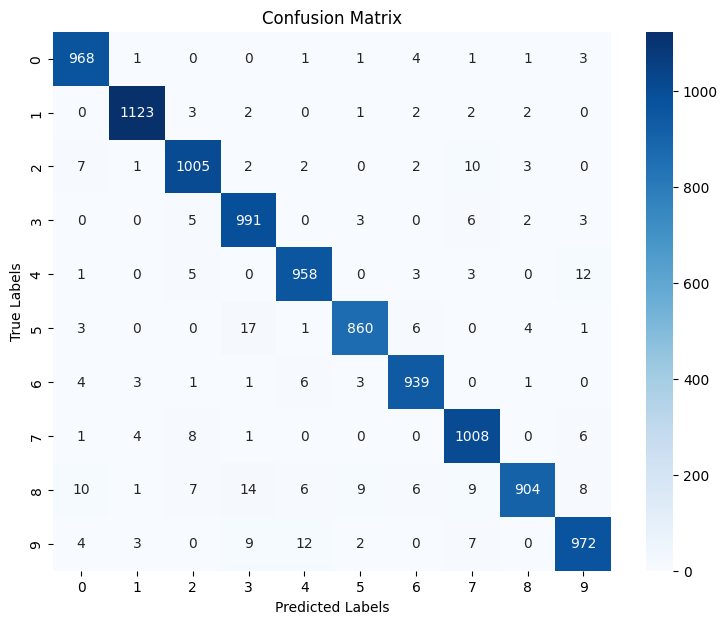

In [16]:
# showing a comfusion matrix
cm = confusion_matrix(image_labels, y_pred_classes)
plt.figure(figsize=(9, 7))
axis = sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
axis.set_title('Confusion Matrix')
axis.set_xlabel('Predicted Labels')
axis.set_ylabel('True Labels')
plt.show()

# Finding some errors
In this section, we will identify and analyze the errors made by our model. Understanding these errors helps us improve the model by focusing on the cases where it struggles. We'll find the incorrect predictions and analyze the predictions where the model was least certain. Finally, we will visualize the top errors to better understand the types of mistakes the model is making.

### Code Cell:

```python
# Finding Errors in The Model:

# Find the indices where the predicted classes are not the same as the true labels.
# - y_pred_classes: The predicted class labels.
# - image_labels: The true class labels.
errors = (y_pred_classes - image_labels != 0)

# Get the predicted class labels for the errors.
y_pred_classes_errors = y_pred_classes[errors]

# Get the predicted probabilities for the errors.
y_pred_errors = y_pred[errors]

# Get the true class labels for the errors.
y_true_errors = image_labels[errors]

# Get the test images corresponding to the errors.
x_test_errors = X_test[errors]

# Find the maximum predicted probability for each error.
y_pred_errors_probability = np.max(y_pred_errors, axis=1)

# Find the true predicted probabilities for each error.
true_probability_errors = np.diagonal(np.take(y_pred_errors, y_true_errors, axis=1))

# Calculate the difference between the predicted and true probabilities.
diff_probability_errors = y_pred_errors_probability - true_probability_errors

# Get the indices of the sorted differences (ascending order).
sorted_idx_diff_errors = np.argsort(diff_probability_errors)

# Get the indices of the top 5 largest differences (most uncertain predictions).
top_idx_diff_errors = sorted_idx_diff_errors[-5:]

# Show the top 5 errors.
num = len(top_idx_diff_errors)
f, ax = plt.subplots(1, num, figsize=(12, 12))

for i in range(num):
    # Display the error images.
    ax[i].imshow(x_test_errors[top_idx_diff_errors[i]].reshape(28, 28), cmap='gray')
    # Set the title to show the predicted and true labels.
    ax[i].set_title(f"Predicted label: {y_pred_classes_errors[top_idx_diff_errors[i]]}, \nTrue label: {y_true_errors[top_idx_diff_errors[i]]}")
    # Turn off the axis.
    ax[i].axis('off')
plt.show()
```

### Explanation:

1. **Finding Errors**:
    - `errors = (y_pred_classes - image_labels != 0)`: This creates a boolean array indicating where the predicted labels do not match the true labels.

2. **Extracting Information About Errors**:
    - `y_pred_classes_errors = y_pred_classes[errors]`: This extracts the predicted labels for the incorrect predictions.
    - `y_pred_errors = y_pred[errors]`: This extracts the predicted probabilities for the incorrect predictions.
    - `y_true_errors = image_labels[errors]`: This extracts the true labels for the incorrect predictions.
    - `x_test_errors = X_test[errors]`: This extracts the test images corresponding to the incorrect predictions.

3. **Analyzing Model Uncertainty**:
    - `y_pred_errors_probability = np.max(y_pred_errors, axis=1)`: This finds the maximum predicted probability for each incorrect prediction.
    - `true_probability_errors = np.diagonal(np.take(y_pred_errors, y_true_errors, axis=1))`: This finds the predicted probability for the true label for each incorrect prediction.
    - `diff_probability_errors = y_pred_errors_probability - true_probability_errors`: This calculates the difference between the predicted probability for the predicted label and the true label.

4. **Identifying Most Uncertain Predictions**:
    - `sorted_idx_diff_errors = np.argsort(diff_probability_errors)`: This sorts the differences in ascending order and returns the indices.
    - `top_idx_diff_errors = sorted_idx_diff_errors[-5:]`: This gets the indices of the top 5 largest differences (most uncertain predictions).

5. **Visualizing Top Errors**:
    - `num = len(top_idx_diff_errors)`: This sets the number of top errors to display.
    - `f, ax = plt.subplots(1, num, figsize=(12, 12))`: This creates a subplot to display the top errors.
    - In the loop, for each top error:
        - `ax[i].imshow(x_test_errors[top_idx_diff_errors[i]].reshape(28, 28), cmap='gray')`: This displays the error image in grayscale.
        - `ax[i].set_title(f"Predicted label: {y_pred_classes_errors[top_idx_diff_errors[i]]}, \nTrue label: {y_true_errors[top_idx_diff_errors[i]]}")`: This sets the title to show the predicted and true labels.
        - `ax[i].axis('off')`: This turns off the axis.

### What is a Confusion Matrix?

A confusion matrix is a summary of prediction results on a classification problem. The number of correct and incorrect predictions are summarized with count values and broken down by each class. This is essential for understanding the types of errors the model is making.

- **True Positives (TP)**: The model correctly predicted the positive class.
- **True Negatives (TN)**: The model correctly predicted the negative class.
- **False Positives (FP)**: The model incorrectly predicted the positive class (Type I error).
- **False Negatives (FN)**: The model incorrectly predicted the negative class (Type II error).

### Why Do We Need a Confusion Matrix?

A confusion matrix provides more detailed information than simple accuracy metrics. It allows us to:

- Understand how well the model is performing for each class.
- Identify specific classes where the model may be underperforming.
- Get insights into the types of errors the model is making, which can guide further improvements and tuning of the model.



In [17]:
# finding the values where the predicted classes are not the same as the values in the image labels
errors = (y_pred_classes - image_labels != 0)
y_pred_classes_errors = y_pred_classes[errors]
y_pred_errors = y_pred[errors]
y_true_errors = image_labels[errors]
x_test_errors = X_test[errors]


In [18]:
# find the errors with the maximum probability, the valus where the algorithm is least certain of their prediction
y_pred_errors_probability = np.max(y_pred_errors, axis=1)
true_probability_errors = np.diagonal(np.take(y_pred_errors, y_true_errors, axis=1))
diff_probability_errors = y_pred_errors_probability - true_probability_errors

# Get list of indices of sorted differences
sorted_idx_diff_errors = np.argsort(diff_probability_errors)
top_idx_diff_errors = sorted_idx_diff_errors[-5:] # shows 5 last ones

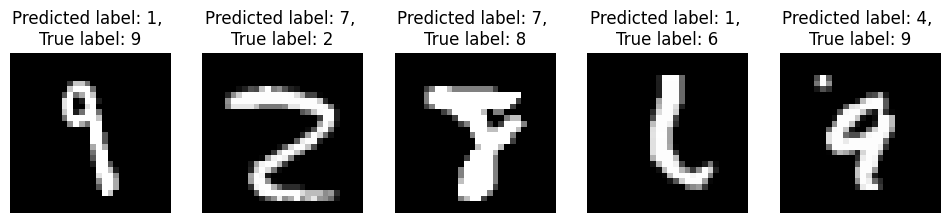

In [19]:
# Show top Errors
num = len(top_idx_diff_errors)
f, ax = plt.subplots(1, num, figsize=(12, 12))

for i in range(0, num):
  ax[i].imshow(x_test_errors[top_idx_diff_errors[i]].reshape(28, 28), cmap='gray')
  ax[i].set_title(f"Predicted label: {y_pred_classes_errors[top_idx_diff_errors[i]]}, \nTrue label: {y_true_errors[top_idx_diff_errors[i]]}")
  ax[i].axis('off')

# Saving our model

In [21]:
model.save('my_mnist_model.keras')

# Importing Model and Making Predictions

In [25]:
from keras.models import load_model

# use loaded model and make predictions
loaded_model = load_model("my_mnist_model.keras")


# make predictions
predictions = loaded_model.predict([X_test])

# print predictions

print(np.argmax(predictions[0]))
print(np.argmax(predictions[1]))
print(np.argmax(predictions[2]))
print(np.argmax(predictions[3]))
print(np.argmax(predictions[4]))


313/313 [==============================] - 1s 2ms/step
7
2
1
0
4


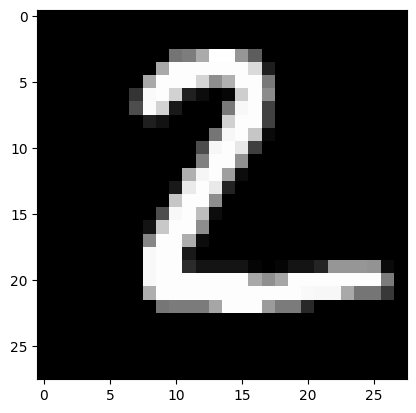

In [28]:
# Plot the prediction
plt.imshow(X_test[1].reshape(28, 28), cmap='gray')
plt.show()